Adapted by Carlos Toxtli https://www.carlostoxtli.com/#mlbasic-4

Source: https://github.com/piyush2896/PolynomialRegression-Tutorial/blob/master/Regressions%2C%20Regularizations%20and%20Learning%20Curves.ipynb

# Machine Learning: Regressions, Regularizations and Learning Curves
Till now we have covered:
* Machine Learning Introduction with Example: We used stock price prediction as an example for us to get into Machine Learning.
* Machine Learning from Scratch - Linear Regression: Gave us an insight on the working of the Linear Regression model we used in the first post, and finally
* Machine Learning from Scratch - Logistic Regression: We moved from Regression to classification and got a hang of how Logistic Regression can be quite useful in an important field like Health Care to predict whether a cancer is Malignant or Benign.

It looks like we have covered the basic ground of Supervised Learning methods to reach a plain where we can work with non-linear data.

*In this post we will work our way through a regression problem but now with a dataset that is not in a simple linear form. That is, the next value in the data is not linearly dependent on the previous value. Using some intuitive ideas we will see how manipulating datasets is a key ingredient of the Machine Learning recipes. Alongside we will also limit, regulate and monitor the performance of our model.*

## Index
1. Linear vs Non-Linear Data
2. Polynomial Regression
  - Dataset
  - Pipelining in Scikit-Learn
3. Learning Curves
4. Regularization
  - L1 Regularization
  - L2 Regularization
5. Lasso Regression
6. Ridge Regression
7. Elastic Net

## Linear vs Non-Linear Data
Let's look directly at examples. Here, I'll be displaying scatter plot of some values lying on the following 2 equations:

$$y = 6x + 3 + \text{noise}$$

and

$$y = 6x^2 + 3x + 4 + \text{noise}$$

where, noise is any random value in the range [-5, 5]

![](https://github.com/piyush2896/PolynomialRegression-Tutorial/blob/master/images/linear_vs_non-linear_data.png?raw=1)

Which curve best describes the motivation level in your life? For me, it is the one at the right. While writing the code, I'm all the way high (not as Joe Rogan ft Elon Musk high) with motivation but when my model is not training well my motivation is all the way there at the bottom and at last when the freaking luck of mine works my motivation is all the way high up there!

What does it tells us about the real world data? It tells us that the real-world data is messy and often non-linear. Having non-linear data presents a challenge here. The challenge is that Linear Regression is good a predicting linear data and logistic regression is good at separating linearly separable data. So we need tricks, algorithms and intuitive skills to leap over this barrier.

Let's look at one such technique here - Polynomial Regression.

## Polynomial Regression
Making new features out of old features in data using by adding powers to features or product of different power of features and finally training on this new set of features using a linear model is what we call Polynomial Regression.

### Our Non-Linear Dataset
Let's generate some random dataset to work on for this post.

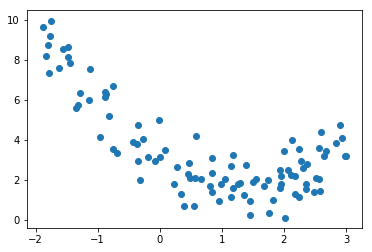

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

First let's apply Linear Regression and see the results:

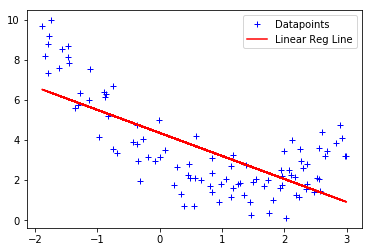

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x1, x2)

preds = lr.predict(x1)

plt.plot(x1, x2, 'b+', label='Datapoints')
plt.plot(x1, preds, 'r-', label='Linear Reg Line')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('RMSE: {:.3f}\nR2: {:3f}'.format(
    np.sqrt(mean_squared_error(x2, preds)), r2_score(x2, preds)))

RMSE: 1.643
R2: 0.507207


As we can see that the `LinearRegression` model is severly underfitting our dataset. Looking back at definition of `Polynomial Regression` we understand that we need to add more features, as powers of already present features, to the mix.

Till now we were predicting $x_2$ using $x_1$ as:

$$x_2 = b + w_1x_1$$

Now what if we can add powers of $x_1$ to the mix till the time we can find the best possible values:

$$x_2 = b + w_1x_1 + w_2x_{1}^{2} + w_3x_{1}^{3} + ... \text{till we get best model}$$

***
> **Note:** In case of more features like $x_1$, $x_2$ and $x_3$ predicting $y$ we can formulate new features for polynomial regression as product of powers of these features as well. For example, $x_{1}^{3}x_{2}^{2}x_3$
***

When we have 1 feature, as in our case here, we can compute new features easily. But what if we have plethora of features? Scikit-learn comes super handy here. The `preprocessing` module of scikit-learn contains one useful class for this purpose - `PolynomialFeatures`. The main argument to the constructor of the class is the maximum degree that we want our features to have. *Remember degree is the sum of power of all the features use in a term, i.e., degree of $x_{1}^{3}x_{2}^{2}x_3$ is 6.*

`PolynomialFeatures` have three main methods that are useful here:
1. `fit()`: fit the data for which you need polynomial features. This should be your train data.
2. `transform()`: After fit is called transform your train, validation and test data using this function.
3. `fit_transform()`: This method is a combination of above two. We basically fit and transform train data in one go.

Let's look it in action:

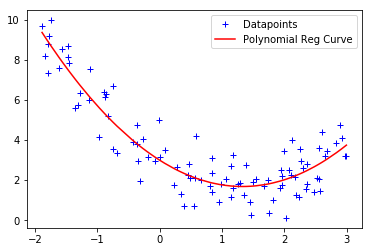

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_feats = PolynomialFeatures(degree=2)
x1_poly = poly_feats.fit_transform(x1)

lr = LinearRegression()
lr.fit(x1_poly, x2)

preds = lr.predict(x1_poly)

plt.plot(x1, x2, 'b+', label='Datapoints')
plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], 'r', label='Polynomial Reg Curve')
plt.legend()
plt.show()

In [ ]:
print('RMSE: {:.3f}\nR2: {:3f}'.format(
    np.sqrt(mean_squared_error(x2, preds)), r2_score(x2, preds)))

RMSE: 0.920
R2: 0.845475


The performance boost is evident in both the performance metrics - RMSE has deacreased and R2 score has increased. The same thing is evident in the plot.

Now that we have worked out a solution let's look at higher degree of polynomial features. We will be looking at five possible degrees - 1, 2, 8, 16, 30

Degree: 1	RMSE: 1.643	R2: 0.507
Degree: 2	RMSE: 0.920	R2: 0.845
Degree: 8	RMSE: 0.915	R2: 0.847
Degree: 16	RMSE: 0.862	R2: 0.864
Degree: 30	RMSE: 0.850	R2: 0.868


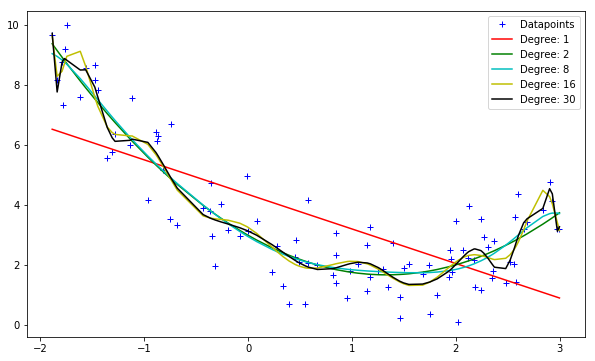

In [ ]:
def get_preds(x1, x2, degree):
    '''A helper function that will compute Polynomial Features
       and compute predictions
    '''
    poly_feats = PolynomialFeatures(degree=degree, include_bias=False)
    x1_poly = poly_feats.fit_transform(x1)
    lr = LinearRegression()
    lr.fit(x1_poly, x2)
    return lr.predict(x1_poly)

# degrees we will be working with and corresponding colors
degrees = [1, 2, 8, 16, 30]
cs = ['r', 'g', 'c', 'y', 'k']

# Politting for degrees
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for degree, c in zip(degrees, cs):
    # Make predictions for degree
    preds = get_preds(x1, x2, degree)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Degree: {}'.format(degree))
    # Print Metrics
    print('Degree: {}\tRMSE: {:.3f}'
          '\tR2: {:.3f}'.format(degree, np.sqrt(mean_squared_error(x2, preds)), r2_score(x2, preds)))

plt.legend()
plt.show()

As we increase model complexity (by increasing the degree of polynomial features) we first go from worst model (degree 1), which have high bias (underfits), to good model (degree 2) and then to another worst model (degree 16 or 30), which have high variance (overfits). So we need to make sure that the increase in complexity doesn't hurt our performance.

One way of understanding the generalization capabilities (capability to perform good on unseen data) of our model is by working with *learning curves*.

### Pipelining in Scikit-Learn
Since we need two steps `PolynomialRegression` and `LinearRegression` to be performed in conjunction to each other, we can use sklearn's `pipeline` module to group them into one single entity:

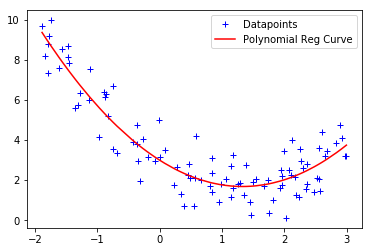

In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly_feats', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])

model.fit(x1, x2)
preds = model.predict(x1)

plt.plot(x1, x2, 'b+', label='Datapoints')
plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], 'r', label='Polynomial Reg Curve')
plt.legend()
plt.show()

## Learning Curves
So what are learning curves? A plot displaying change in metrics value for train and validation sets with change in training set size. Let's make a general function for us to do so.

In [ ]:
from sklearn.model_selection import train_test_split

def plot_lcs(model, X, Y, val_split=0.2, metrics=mean_squared_error):
    # train val split
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
    # collections of errors:
    train_time_loss, val_time_loss = [], []
    # iterating over train size:
    for train_size in range(1, len(x_train)):
        # training
        model.fit(x_train[:train_size], y_train[:train_size])
        # train and val predictions
        train_preds = model.predict(x_train[:train_size])
        val_preds = model.predict(x_val)
        # metrics calculation
        train_time_loss.append(metrics(y_train[:train_size], train_preds))
        val_time_loss.append(metrics(y_val, val_preds))
    # plotting curves
    plt.plot(np.sqrt(train_time_loss), 'r-*', label='Train loss')
    plt.plot(np.sqrt(val_time_loss), 'b-+', label='Val loss')
    plt.ylabel('RMSE')
    plt.xlabel('Training Set Size')

Let's try out our pipelined model from last section and see its performance using learning curves:

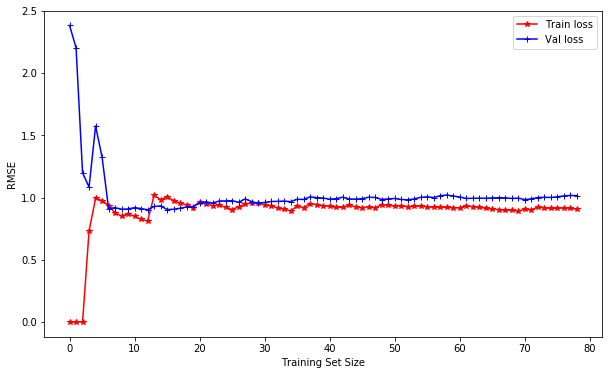

In [ ]:
plt.figure(figsize=(10, 6))
plot_lcs(model, x1, x2)
plt.legend()
plt.show()

Trying out same with a model having polynomial features of degree 12:

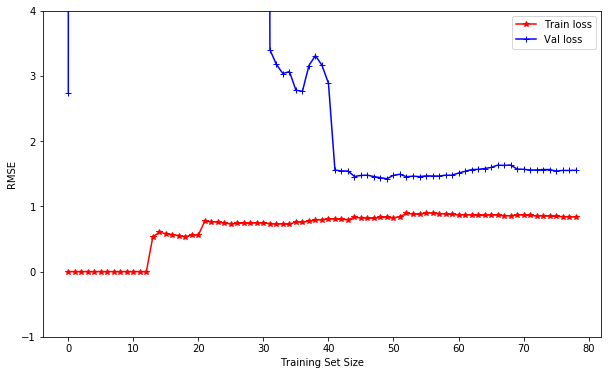

In [ ]:
model = Pipeline([
    ('poly_feats', PolynomialFeatures(degree=12, include_bias=False)),
    ('lr', LinearRegression())
])

plt.figure(figsize=(10, 6))
plot_lcs(model, x1, x2)
plt.ylim(-1, 4)
plt.legend()
plt.show()

Looking closely we can see that the gap between Validation loss curve and the training loss curve increased. Along with this we can also see that the loss for training set is much more lower than the validation set. These two generally are the symptoms of a high variance problem. In other words they display that the model is overfitting the training data hence performing poorly on unseen data.

But what if there are features in higher degree polynomials that better describes our predictions than the features used in lower degree polynomials. What if there was a way to regularize the overfitting aspect of a higher degree polynomial regression? Let's discuss the concept of regularization in the next section.

## Regularization
We just learnt how to make a model complex. But this led us to an issue where complexity made the model overfit the training data. Now we will ask model to constraint the features which overfit the data and make itself a little simpler on its own. In other words, we will ask a model with higher degrees of freedom (like 16) to penalize the weights who are making it overfit the data.

Consider a model with only 1 feature $w_1$ and bias $b$. If we limit $b$ to be 0 then the model will be a little simpler as it only depends on $w_1$. But what if we limit both $b$ and $w_1$ to be small? The model will be complex when compare to when $b=0$ but simpler compare to the model with no constraints on $w_1$ and $b$.

Even though there are many types of regularization out there we will be looking two main types:
1. L1 Regularization
2. L2 Regularization

### L1 Regularization
L1 regularization represents the addition of a regularized term - few parts of *l1* norm, to the loss function (mse in case of linear regression). Here, if weights are represented as $w_0$, $w_1$, $w_2$ and so on, where $w_0$ represents bias term then their *l1* norm is given as:

$$\text{L1 norm} = \sum_{i=1}^{n}|w_i|$$

We add a few parts of this regularized term to our loss function. Hence we multiply a regularization coefficient $\alpha$ to this term before adding it to the loss function, making our final loss function:

$$J(w;x, y) = MSE(w;x, y) + \alpha\sum_{i=1}^{n}|w_i|$$

If $\alpha$ is close to 0 this essentially becomes a Linear Regression model while if $\alpha$ if too large then every $w$ becomes 0 giving us a flat line.

***The special thing about this regularization term is that it basically gives us a sparse model.*** But what does this means? L1 regularization basically eliminate weights of least important terms and convert them to 0. This gives us weight vector that have only few non-zero values, hence a sparse model.

Now, let us take a step back and carefully look at the new loss function. Ummmm, what the... Our loss function is non-differentiable since the l1 norm uses absolute values! How in the world should we train our model? Do we use something other than gradient descent?

![](https://predictiveprogrammer.com/wp-content/uploads/2018/11/scared_cat.jpg)

The answer to last question is yes as well as no. We use gradient descent but we use our brain to calculate *subgradients* of the l1 norm. Here the subgradient is basically the sign function applied to the weight with which we are differentiating. How? Partial differentiation of *l1* norm (without the absolute operator) w.r.t $w_i$ will basically the 0 for every other weight $w_j$ where $j\neq i$ and 1 for the weight itself:

$$\frac{\partial}{\partial w_i}({w_1 + w_2 + ... + w_i + ... + w_n}) = ({0 + 0 + ... + 1 + ... + 0})$$

Now that we have this we just add the sign of the weight infront of 1. If the weight is 0 then the gradient is 0 as we have already eliminated the coefficient.

### L2 Regularization
L2 regularization represents the addition of a regularizaed term - few parts of *l2* norm, to the loss function (mse in case of linear regression). Here, if weights are represented as $w_0$, $w_1$, $w_2$ and so on, where $w_0$ represents bias term then their *l2* norm is given as:

$$\text{L2 norm} = \sum_{i=1}^{n}w_{i}^{2}$$

Same as L1 Regularizer, we add a few parts of this regularized term to our loss function. Hence we multiply a regularization coefficient $\alpha$ to this term before adding it to the loss function, making our final loss function:

$$J(w;x, y) = MSE(w;x, y) + \alpha\sum_{i=1}^{n}w_{i}^{2}$$

Remember, if $\alpha$ is close to 0 this essentially becomes a Linear Regression model while if $\alpha$ if too large then every $w$ *be very close to* 0 giving us a flat line.

The nice thing about this regularizer is that it is differentiable. So we can use gradient descent without using some fancy stuff as subgradients.

***
> **Note:** It is important to scale data before most regularization techniques as they are sensitive to scale of data.
***

## Lasso Regression
Just for fun, Lasso stands for *Least Absolute Shrinkage and Selection Operator*. So let's just call it Lasso Regression. \\_( ^ _ ^ )_/

Lasso Regression is a regularized version of Linear Regression that uses [L1 regularization](#l1-reg). Scikit-Learn gives us a simple implementation of it. Let's try it out with various values of alpha - 0, 0.7 and 5 with a model of degree 16.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.63688381118024, tolerance: 0.054789906110949506
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.6708042987932, tolerance: 0.054789906110949506
  positive)


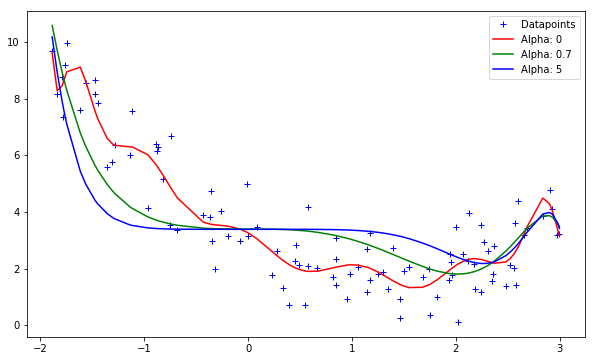

In [ ]:
from sklearn.linear_model import Lasso

def get_preds_lasso(x1, x2, alpha):
    if alpha == 0:
        # Some issues with alpha = 0 in Lasso.
        # We know that alpha=0 is essentially LinearRegression
        # so we will use it
        model = Pipeline([
            ('poly_feats', PolynomialFeatures(degree=16)),
            ('lasso', LinearRegression())
        ])
    else:
        model = Pipeline([
            ('poly_feats', PolynomialFeatures(degree=16)),
            ('lasso', Lasso(alpha=alpha))
        ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.7, 5]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

So we have to set regularization coefficient keeping in mind that it doesn't start to underfits the model.

## Ridge Regression
Ridge Regression is a regularized version of Linear Regression that uses [L2 regularization](#l2-reg). Scikit-Learn gives us a simple implementation of it. Let's try it out with various values of alpha - 0, 20 and 200 with a model of degree 16.

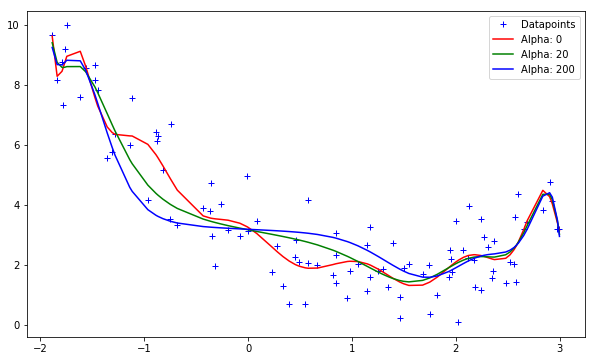

In [ ]:
from sklearn.linear_model import Ridge

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

## Elastic Net
Elastic Net is the path of equanimity. Just kidding. It is a combination of Lasso Regression and Ridge Regression. Represented by:

$$J(w; x, y) = MSE(w; x, y) + r\alpha\sum_{i=1}^{n}|w_i| + \frac{1 - r}{2}\alpha\sum_{i=1}^{n}w_{i}^{2}$$

Here $r$ represents the mix ratio of the two.

So, which to use when? Well, this advice I took directly from one of the best ever practical Machine Learning book I read - [WRITE BOOK NAME](). A general rule of thumb is a little regularization is always good. So avoid plain old Linear Regression. Ridge is good default! But if you have intuition that few of the features are only useful go with Lasso or Elastic Net. If the number of features are high then prefer Elastic Net as Lasso might behave erratically when the number of features are greater than number of training instances.

Let's try out elastic net ourselves.

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.6548112557302, tolerance: 0.054789906110949506
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.23618507322357, tolerance: 0.054789906110949506
  positive)
/usr/local/lib/python3.6/dist-pack

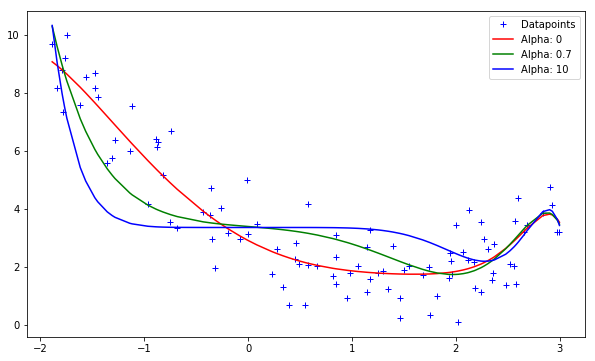

In [ ]:
from sklearn.linear_model import ElasticNet

def get_preds_enet(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', ElasticNet(alpha=alpha, l1_ratio=0.5))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.7, 10]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_enet(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

This brings us to the end of the post. It looks like we learnt a lot in just one post and covered a lot of ground. Next post will be super important one. We will be covering 1 of the most import machine learning algorithm.


Subscribe to our newsletter and never miss any updates from Predictive Programmer!